In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')

## 1. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.fillna(df['horsepower'].mean(), inplace=True)

In [6]:
df.origin.value_counts(normalize=True)

usa       0.625628
japan     0.198492
europe    0.175879
Name: origin, dtype: float64

In [7]:
df.model_year.value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

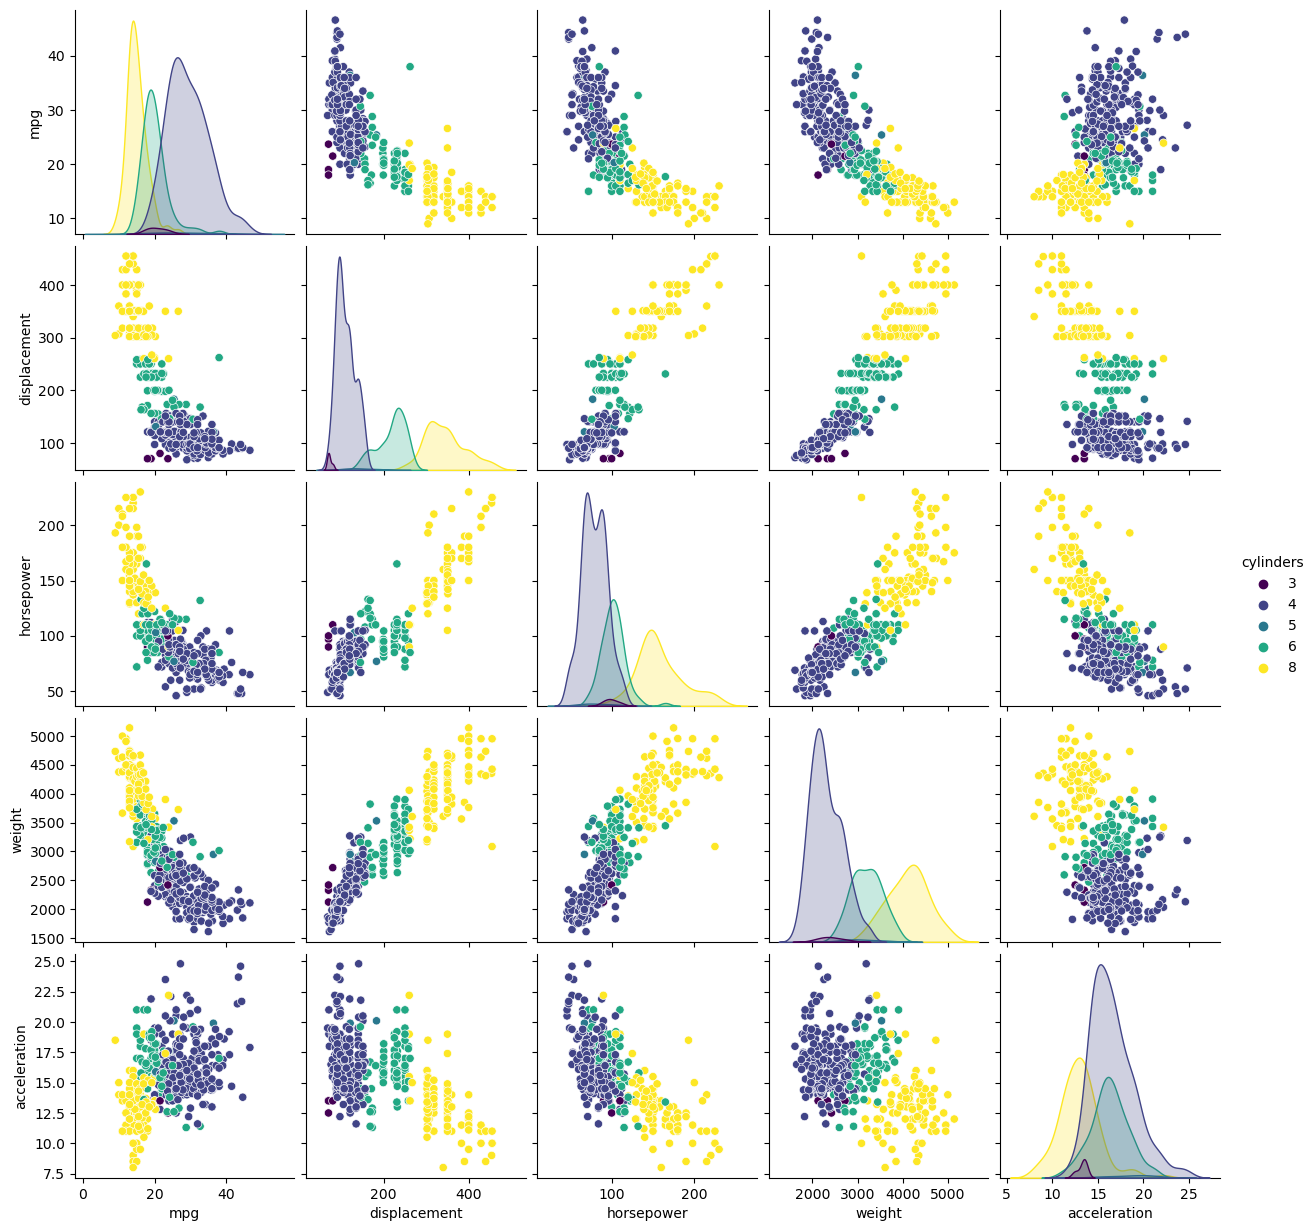

In [8]:
sns.pairplot(df.drop(['model_year'], axis=1), hue='cylinders',
             palette='viridis')
plt.show()

In [9]:
df.query('acceleration > 24')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
299,peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,europe
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe


In [10]:
df.query('horsepower > 200 and weight < 3500')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
13,buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,usa


In [11]:
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [12]:
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']
for col in cols:
    print(f'max {col}: {df[col].max()}')

max mpg: 46.6
max cylinders: 8
max displacement: 455.0
max horsepower: 230.0
max weight: 5140
max acceleration: 24.8
max model_year: 82


In [13]:
for col in cols:
    print(f'min {col}: {df[col].min()}')

min mpg: 9.0
min cylinders: 3
min displacement: 68.0
min horsepower: 46.0
min weight: 1613
min acceleration: 8.0
min model_year: 70


In [14]:
df['manufacturer'] = df['name'].apply(lambda x: x.split(' ')[0])

In [15]:
df.name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [16]:
# This manufacturer sounds peculiar
df.query('manufacturer == "hi"')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,manufacturer
28,hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,usa,hi


In [17]:
df.replace({'manufacturer':{"maxda":"mazda" , 
                        "toyouta":"toyota" ,
                        "vokswagen":"volkswagen" ,
                        "vw":"volkswagen",
                        "mercedes-benz":"mercedes",
                        "chevroelt":"chevrolet",
                        "chevy":"chevrolet",
                        "hi": "ih"}},inplace=True)     # I believe it's called ih 
                                                       # (international harvester) not hi

In [18]:
countries = ['usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'japan',
             'japan', 'germany', 'france', 'germany', 'sweden', 'germany',
             'usa', 'usa', 'germany', 'italy', 'usa', 'usa', 'japan', 'sweden',
             'france', 'japan', 'japan', 'usa', 'germany', 'usa', 'great britain', 'japan']

In [19]:
df_countries = pd.concat([pd.Series(df['manufacturer'].unique()), pd.Series(countries),
                          pd.Series(df['manufacturer'].value_counts() \
                                                      .reset_index(drop=True))],
                         axis=1)
df_countries.rename(columns={'manufacturer': 'Count', 1:'origin'}, inplace=True)

In [20]:
fig = px.choropleth(df_countries.groupby('origin')['Count'].sum().reset_index(),
              locations='origin',
              locationmode='country names',
              color='Count',
              color_continuous_scale='geyser',
              title='Car Count by Country'
              )
fig.update_layout(margin=dict(l=30, r=80, t=50, b=150))
fig.show()

In [21]:
df.head(3)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,manufacturer
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,buick
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth


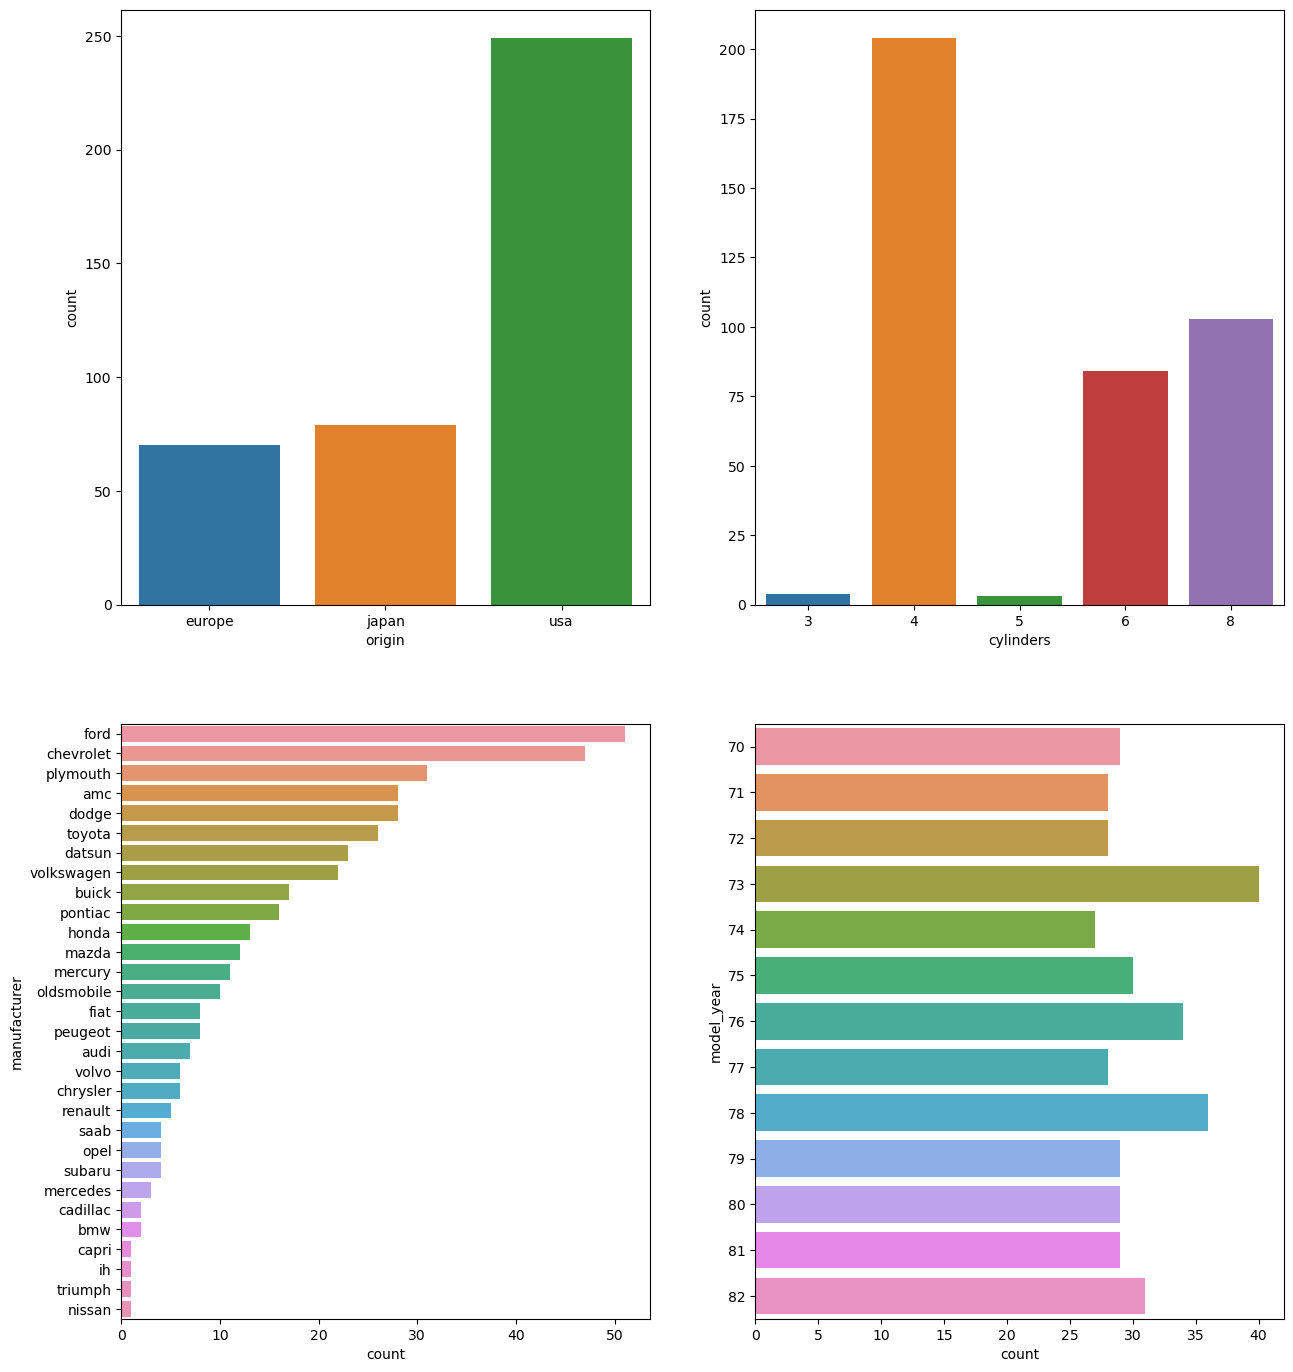

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(15, 17))
sns.countplot(x=df['origin'],
              order=df['origin'] \
              .value_counts(ascending=True).index, ax=ax[0, 0])

sns.countplot(x=df['cylinders'], ax=ax[0, 1])
sns.countplot(y=df['manufacturer'], 
              order=df['manufacturer'] \
              .value_counts(ascending=False).index,
              orient='h', ax=ax[1, 0])

sns.countplot(y=df['model_year'], 
              orient='h', ax=ax[1, 1])
plt.show()

## Training

In [23]:
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [24]:
df_X = df.drop(['mpg', 'name'], axis=1)
df_y = df['mpg']

In [25]:
df_X = pd.get_dummies(df_X)

In [26]:
df_X.loc[0, :]

cylinders                     8.0
displacement                307.0
horsepower                  130.0
weight                     3504.0
acceleration                 12.0
model_year                   70.0
origin_europe                 0.0
origin_japan                  0.0
origin_usa                    1.0
manufacturer_amc              0.0
manufacturer_audi             0.0
manufacturer_bmw              0.0
manufacturer_buick            0.0
manufacturer_cadillac         0.0
manufacturer_capri            0.0
manufacturer_chevrolet        1.0
manufacturer_chrysler         0.0
manufacturer_datsun           0.0
manufacturer_dodge            0.0
manufacturer_fiat             0.0
manufacturer_ford             0.0
manufacturer_honda            0.0
manufacturer_ih               0.0
manufacturer_mazda            0.0
manufacturer_mercedes         0.0
manufacturer_mercury          0.0
manufacturer_nissan           0.0
manufacturer_oldsmobile       0.0
manufacturer_opel             0.0
manufacturer_p

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# 1. Lasso Regression

In [30]:
lasso_cv = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

0.06

In [31]:
lasso = Lasso(alpha=0.06).fit(X_train, y_train)
yhat = lasso.predict(X_test)
lasso_score = mean_squared_error(yhat, y_test)
lasso_score

8.147241736519996

In [32]:
np.sum(lasso.coef_ != 0)

9

# 2. Ridge Regression

In [33]:
ridge_cv = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

0.5

In [34]:
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
yhat = ridge.predict(X_test)
ridge_score = mean_squared_error(yhat, y_test)
ridge_score

9.443081278573244

# 3. Linear Regression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                                                    shuffle=True,
                                                    random_state=42)

In [36]:
linear = LinearRegression().fit(X_train, y_train)

In [37]:
yhat = linear.predict(X_test)
linear_score = mean_squared_error(yhat, y_test)
linear_score

10.728753690214914

In [38]:
lasso_score, ridge_score, linear_score

(8.147241736519996, 9.443081278573244, 10.728753690214914)

#### Lasso regression looks most promising for this particular dataset